# Numerov Calculation Script

In [1]:
import numpy as np
import pandas as pd
import scipy.constants as const
import matplotlib.pyplot as plt

/home/lme/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Data Read-In

We need the scan file with the dipole moment and we need our numerov.dat file

In [3]:
df = pd.read_csv("f_2/numerov.dat", skiprows = 2, names = ["Distances","Energies","Wf_shifted_0","Wf_shifted_1","Wf_shifted_2","Wf_shifted_3","Wf_shifted_4","Wf_0","Wf_1","Wf_2","Wf_3","Wf_4"], sep="\s+")

eigenvalues = pd.read_csv("f_2/numerov.dat", skiprows=1, nrows=1, sep="\s+",names=["a","b","c","d","e","f"])

scan_dat = pd.read_csv("f_2/scan_data.dat",sep="\t",names=["Distances", "Energy", "Dipole_vectors_xyz"])

dipole_vectors = scan_dat.loc[:, "Dipole_vectors_xyz"]

# This splits the individual dipole vectors
dipole_vectors_split = dipole_vectors.str.split(r'\s+',expand=True)
dipole_vectors_split = dipole_vectors_split.astype(float)




In [8]:


eigenvalues_numpy = eigenvalues.to_numpy()
eigenvalues_slices = eigenvalues_numpy[0,1:]




# Next of we calculate v_n0

eigenvalue_0 = eigenvalues_slices[0]
print("eigenvalue_0:", eigenvalue_0)


# Now we iterate and calculate all our v_n0s

v_n0 = []
for i, eig in enumerate(eigenvalues_slices):
    if i == 0:
        continue
    else:
        v_n0.append((eig - eigenvalue_0)/const.h * 6.9477e-21) 

# we have to turn this into a wavenumber ws

c = const.speed_of_light * 100 # in cm/s

v_n = []   #v_n in cm^-1
for freq in v_n0:
    v_n.append(freq / c)


    
# Select all x,y,z values for our dipole moment

mu_x = dipole_vectors_split.loc[:, 0]
mu_y = dipole_vectors_split.loc[:, 1]
mu_z = dipole_vectors_split.loc[:, 2]



# And get the bond distances

distances = df.loc[:, "Distances"]



# Select the Wave_Functions for the y_0 and y_n --> as there are just 4 we can do this manually

wf_0 = df.loc[:, "Wf_shifted_0"]
wf_1 = df.loc[:, "Wf_shifted_1"]
wf_2 = df.loc[:, "Wf_shifted_2"]
wf_3 = df.loc[:, "Wf_shifted_3"]
wf_4 = df.loc[:, "Wf_shifted_4"]


# Make a integrand function

def calculate_integrand(wf_0,mu_comp,wf_n):
    return np.array(wf_0 * mu_comp*wf_1)

integral_mu_x = []
integral_mu_y = []
integral_mu_z = []
for i in range(1,5):

    wf_0 = df.loc[:, "Wf_shifted_0"]
    wf_n = df.loc[:, f"Wf_shifted_{i}"]
    integral_mu_x.append(np.trapz(calculate_integrand(wf_0,mu_x,wf_n),distances))
    integral_mu_y.append(np.trapz(calculate_integrand(wf_0,mu_y,wf_n),distances))
    integral_mu_z.append(np.trapz(calculate_integrand(wf_0,mu_z,wf_n),distances))


# Now we can calculate the transition dipole moment for n=1-4

mu_n_squared = []

for i in range(4):
    mu_n_squared.append(abs(integral_mu_x[i])**2 + abs(integral_mu_y[i])**2 + abs(integral_mu_z[i])**2)

print("mu_n_squared:", mu_n_squared)

f_n0 = []
for i in range(4):
    f_n0.append((4.702e-7)*mu_n_squared[i]*v_n[i])

print("f_n0:",f_n0)





        


eigenvalue_0: 1.484791735342
mu_n_squared: [0.0, 0.0, 0.0, 0.0]
f_n0: [0.0, 0.0, 0.0, 0.0]


In [9]:
print(c)

29979245800.0


In [10]:
g=open("LiH_numerov_calc_output.dat", "a")
print("mu_n_squared:", mu_n_squared, file=g)
print("f_n0:",f_n0, file=g)



### Harmonic

In [11]:
data=pd.read_csv("trans_formic_H_data.dat", sep="\s+", names=["Distance", "Energy", "x","y", "z"])

FileNotFoundError: [Errno 2] No such file or directory: 'trans_formic_H_data.dat'

In [ ]:
energy=df["Energies"]
energy_list=(list(energy))
e_min=min(energy)
print(e_min)
index_emin=energy_list.index(e_min)
print(energy)

0.0
0      613.785376
1      567.360068
2      524.278717
3      484.290763
4      447.166422
          ...    
146    101.374924
147    102.204554
148    103.025424
149    103.837612
150    104.641195
Name: Energies, Length: 151, dtype: float64


In [ ]:
print(energy[index_emin-1])

0.05750246054959


In [ ]:
k=((energy[index_emin-1]-2*e_min+energy[index_emin+1])/((0.01)**2))
print(k)

1123.2231797476


In [ ]:
y=data["Energy"]
y_list=list(y)
x=data["Distance"]
x0=x[y_list.index(min(y))]
harmonic=0.5*k*(x-x0)**2
print(harmonic)

0      140.402897
1      134.842943
2      129.395310
3      124.054721
4      118.837012
          ...    
146    517.581241
147    528.420345
148    539.371771
149    550.446639
150    561.611590
Name: Distance, Length: 151, dtype: float64


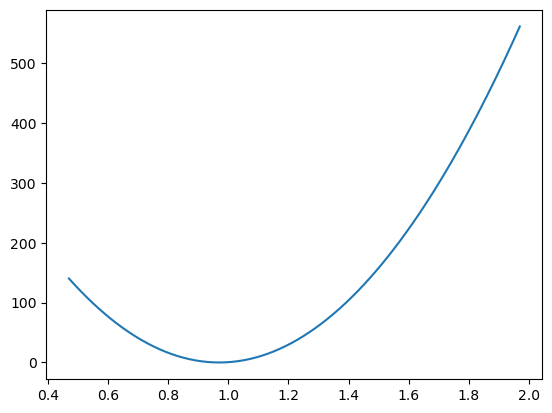

In [ ]:
plt.plot(x, harmonic)

### Plotting

In [ ]:
x=df["Distances"]
y_1=df["Energies"]

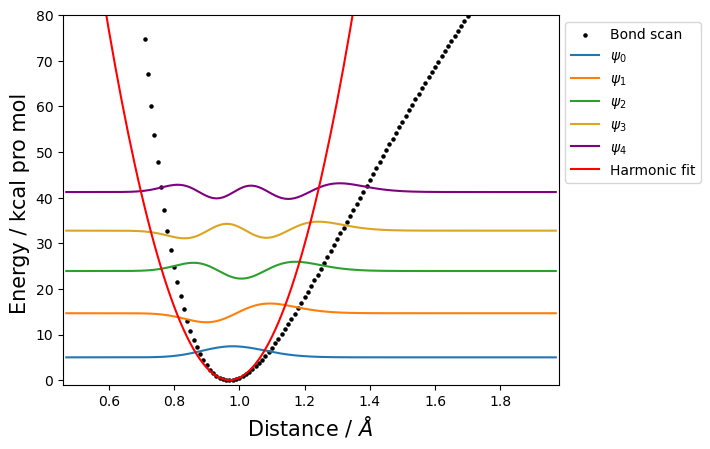

In [ ]:
plt.scatter(x,y_1, s=5, c="black", label="Bond scan")
plt.xlabel(r"Distance / $\AA$ ", size=15)
plt.ylabel("Energy / kcal pro mol ", size=15)
#plt.title("Bond Scan of LiH", size =20)
plt.plot(x, df['Wf_shifted_0'], label=r"$\psi_0$")
plt.plot(x, df['Wf_shifted_1'], label=r"$\psi_1$")
plt.plot(x, df['Wf_shifted_2'], label=r"$\psi_2$")
plt.plot(x, df['Wf_shifted_3'], label=r"$\psi_3$", c='goldenrod')
plt.plot(x, df['Wf_shifted_4'], label=r"$\psi_4$", c='purple')
plt.plot(x,harmonic,c="red", label="Harmonic fit")
plt.ylim(-1, 80)
xmin=min(x)
xmax=max(x)
plt.xlim(xmin-0.01,xmax+0.01)
plt.legend(loc="upper right", bbox_to_anchor=[0.3, 0, 1, 1])
#plt.savefig("Bond_scan_trans_formic_H_numerov.png", dpi=700, bbox_inches="tight")

In [ ]:
energy_cm=df['Energies']*349.757
wf_cm0=df["Wf_shifted_0"]*349.757
wf_cm1=df["Wf_shifted_1"]*349.757
wf_cm2=df["Wf_shifted_2"]*349.757
wf_cm3=df["Wf_shifted_3"]*349.757
wf_cm4=df["Wf_shifted_4"]*349.757
harmonic_cm=harmonic*349.757

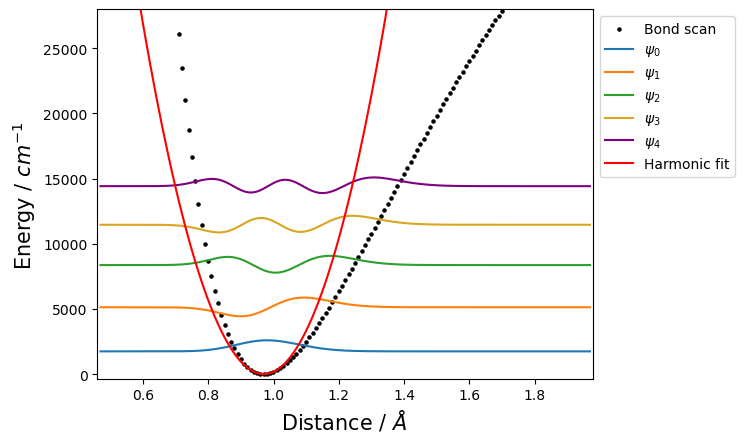

In [ ]:
plt.scatter(x,energy_cm, s=5, c="black", label="Bond scan")
plt.xlabel(r"Distance / $\AA$ ", size=15)
plt.ylabel("Energy / $cm^{-1}$ ", size=15)
#plt.title("Bond Scan of LiH", size =20)
plt.plot(x, wf_cm0, label=r"$\psi_0$")
plt.plot(x, wf_cm1, label=r"$\psi_1$")
plt.plot(x, wf_cm2, label=r"$\psi_2$")
plt.plot(x, wf_cm3, label=r"$\psi_3$", c="goldenrod")
plt.plot(x, wf_cm4, label=r"$\psi_4$", c="purple")
plt.plot(x,harmonic_cm,c="red", label="Harmonic fit")
plt.legend(loc="upper right", bbox_to_anchor=[0.3, 0, 1, 1])
plt.ylim(-350, 28000)
xmin=min(x)
xmax=max(x)
plt.xlim(xmin-0.01,xmax+0.01)
#plt.savefig("Bond_scan_trans_formic_H_numerov_cm.png", dpi=700, bbox_inches="tight")